In [1]:
%pip install scikit-gstat

  Using cached scikit_gstat-1.0.12-py3-none-any.whl (703 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import Matern
import skgstat as skg
from skgstat import models

In [3]:
with open('81T_1600m.txt', 'r') as file:
    lines = file.readlines()
    
data = [line.strip().split(',') for line in lines]
df = pd.DataFrame(data)
df.columns = data[0]
df = df[1:]
df = df.iloc[:, 1:6]
df.columns = ['X','Y','Z','x_dist','detrended']
df.head()

,X,Y,Z,x_dist,detrended
1,-1652968.18399184,-486038.331214966,-685.328002929688,0,29.0483641274819
2,-1653012.60229769,-486015.374427186,-685.328002929688,50,30.1229746974672
3,-1653057.02060355,-485992.417639406,-682.525451660156,100,34.0001365369843
4,-1653101.4389094,-485969.460851627,-682.525451660156,150,35.0747471069695
5,-1653145.85721525,-485946.504063847,-703.623962402344,200,15.0508469347667


In [4]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

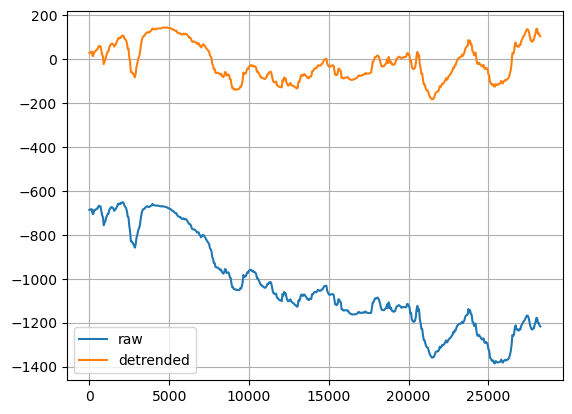

In [5]:
plt.plot(df['x_dist'], df['Z'], label="raw")
plt.plot(df['x_dist'], df['detrended'], label="detrended")
plt.legend()
plt.grid(True)
plt.show()

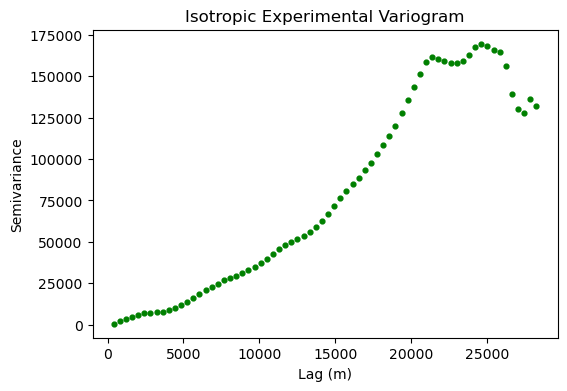

In [6]:
coords = df[['X','Y']].values
values = df['Z']

maxlag = 30000
n_lags = 70

# compute variogram
V1 = skg.Variogram(coords, values, bin_func='even', n_lags=n_lags, maxlag=maxlag, normalize=False)

# extract variogram values
xdata = V1.bins
ydata = V1.experimental

plt.figure(figsize=(6,4))
plt.scatter(xdata, ydata, s=12, c='g')
plt.title('Isotropic Experimental Variogram')
plt.xlabel('Lag (m)'); plt.ylabel('Semivariance')
plt.show()

In [7]:
# use exponential variogram model
V1.model = 'exponential' 
V1.parameters

# use Gaussian model
V2 = V1
V2.model = 'gaussian' 
V2.parameters

# use spherical model
V3 = V1
V3.model = 'spherical' 
V3.parameters

[28250.0000000014, 135486.76947890074, 0]

In [8]:
# evaluate models
xi =np.linspace(0, xdata[-1], 100) 

y_exp = [models.exponential(h, V1.parameters[0], V1.parameters[1], V1.parameters[2]) for h in xi]
y_gauss = [models.gaussian(h, V2.parameters[0], V2.parameters[1], V2.parameters[2]) for h in xi]
y_sph = [models.spherical(h, V3.parameters[0], V3.parameters[1], V3.parameters[2]) for h in xi]

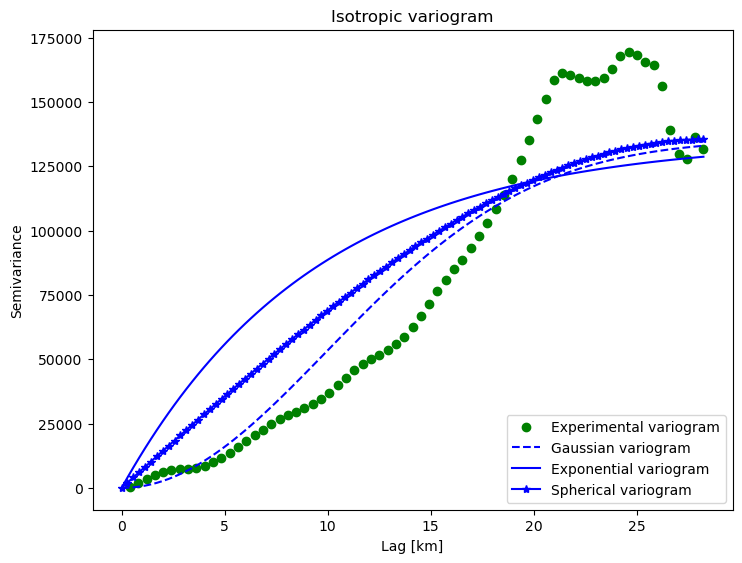

In [9]:
# plot variogram model
fig = plt.figure()
plt.plot(xdata/1000,ydata,'og', label = "Experimental variogram")
plt.plot(xi/1000, y_gauss,'b--', label='Gaussian variogram')
plt.plot(xi/1000, y_exp,'b-', label='Exponential variogram')
plt.plot(xi/1000, y_sph,'b*-', label='Spherical variogram')
plt.title('Isotropic variogram')
plt.xlabel('Lag [km]'); plt.ylabel('Semivariance')  
plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=1.0) # adjust the plot size
plt.legend(loc='lower right')

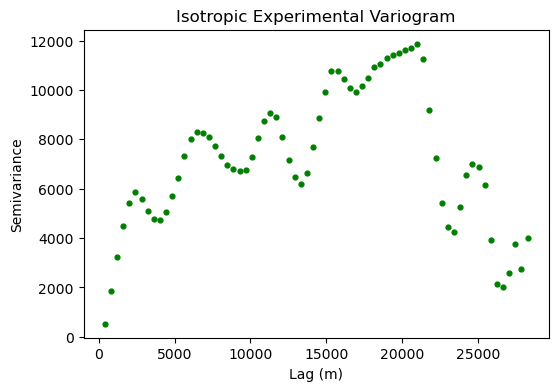

In [10]:
coords = df[['X','Y']].values
values = df['detrended']

maxlag = 30000
n_lags = 70

# compute variogram
V1 = skg.Variogram(coords, values, bin_func='even', n_lags=n_lags, maxlag=maxlag, normalize=False)

# extract variogram values
xdata = V1.bins
ydata = V1.experimental

plt.figure(figsize=(6,4))
plt.scatter(xdata, ydata, s=12, c='g')
plt.title('Isotropic Experimental Variogram')
plt.xlabel('Lag (m)'); plt.ylabel('Semivariance')
plt.show()

In [11]:
# use exponential variogram model
V1.model = 'exponential' 
V1.parameters

# use Gaussian model
V2 = V1
V2.model = 'gaussian' 
V2.parameters

# use spherical model
V3 = V1
V3.model = 'spherical' 
V3.parameters

[6721.672912100893, 7768.432912498178, 0]

In [12]:
# evaluate models
xi =np.linspace(0, xdata[-1], 100) 

y_exp = [models.exponential(h, V1.parameters[0], V1.parameters[1], V1.parameters[2]) for h in xi]
y_gauss = [models.gaussian(h, V2.parameters[0], V2.parameters[1], V2.parameters[2]) for h in xi]
y_sph = [models.spherical(h, V3.parameters[0], V3.parameters[1], V3.parameters[2]) for h in xi]

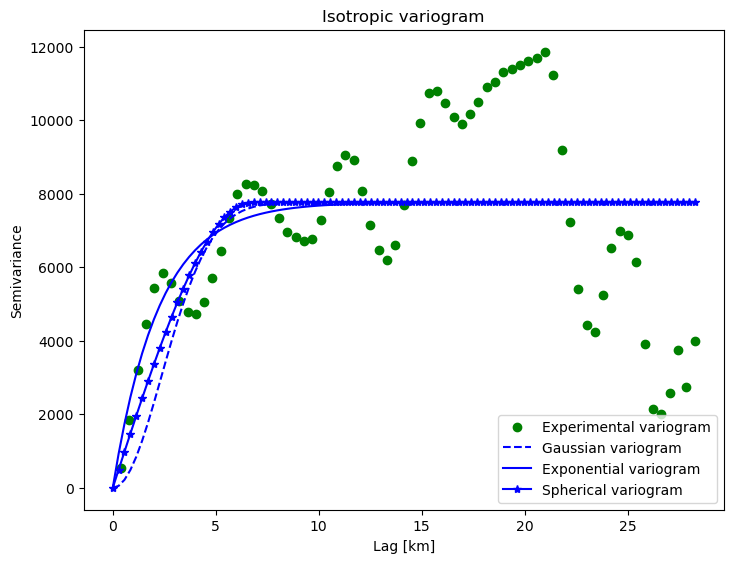

In [13]:
# plot variogram model
fig = plt.figure()
plt.plot(xdata/1000,ydata,'og', label = "Experimental variogram")
plt.plot(xi/1000, y_gauss,'b--', label='Gaussian variogram')
plt.plot(xi/1000, y_exp,'b-', label='Exponential variogram')
plt.plot(xi/1000, y_sph,'b*-', label='Spherical variogram')
plt.title('Isotropic variogram')
plt.xlabel('Lag [km]'); plt.ylabel('Semivariance')  
plt.subplots_adjust(left=0.0, bottom=0.0, right=1, top=1.0) # adjust the plot size
plt.legend(loc='lower right')

In [49]:
X = df['x_dist'].values.reshape(-1, 1)
y = df['Z'].values
y_det = df['detrended'].values

In [55]:
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)
X_train, y_train = X[training_indices], y[training_indices]

In [56]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1, 1e5))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

/srv/conda/envs/notebook/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


316**2 * RBF(length_scale=4.94e+03)

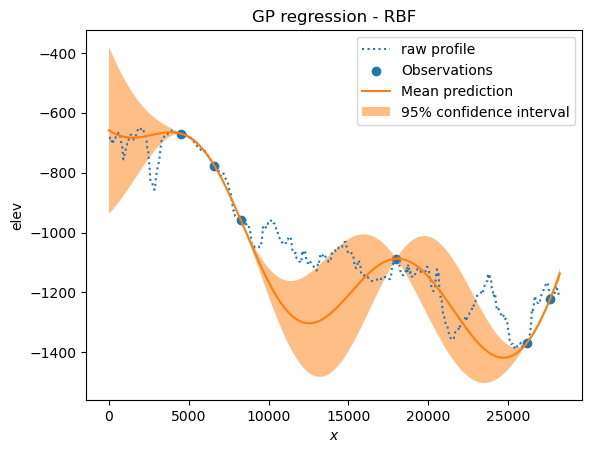

In [58]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"raw profile", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("elev")
_ = plt.title("GP regression - RBF")

Matern kernel

In [59]:
kernel = 1 * Matern(length_scale=1.0, length_scale_bounds=(1, 1e5))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

/srv/conda/envs/notebook/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


316**2 * Matern(length_scale=9.52e+03, nu=1.5)

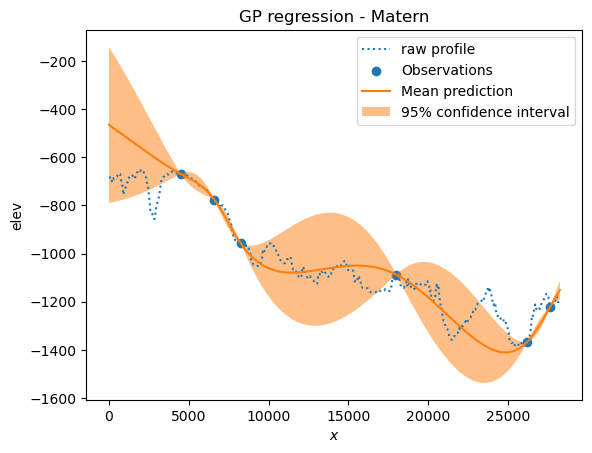

In [60]:
mean_prediction2, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"raw profile", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction2, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction2 - 1.96 * std_prediction,
    mean_prediction2 + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("elev")
_ = plt.title("GP regression - Matern")

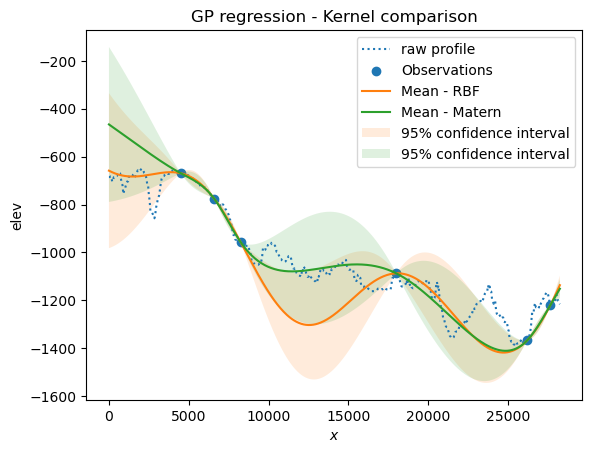

In [61]:
plt.plot(X, y, label=r"raw profile", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean - RBF")
plt.plot(X, mean_prediction2, label="Mean - Matern")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.15,
    label=r"95% confidence interval",
)
plt.fill_between(
    X.ravel(),
    mean_prediction2 - 1.96 * std_prediction,
    mean_prediction2 + 1.96 * std_prediction,
    alpha=0.15,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("elev")
_ = plt.title("GP regression - Kernel comparison")

Detrended Profile

In [63]:
training_indices_det = rng.choice(np.arange(y_det.size), size=10, replace=False)
X_train_det, y_train_det = X[training_indices_det], y_det[training_indices_det]

In [64]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1, 2e3))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train_det, y_train_det)
gaussian_process.kernel_

106**2 * RBF(length_scale=1.36e+03)

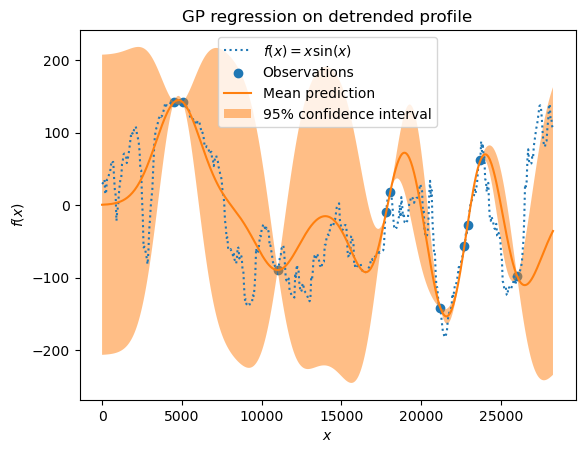

In [65]:
mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y_det, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train_det, y_train_det, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("GP regression on detrended profile")

In [66]:
kernel = 1 * Matern(length_scale=1.0, length_scale_bounds=(1, 2e3))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(X_train_det, y_train_det)
gaussian_process.kernel_

98.6**2 * Matern(length_scale=1.55e+03, nu=1.5)

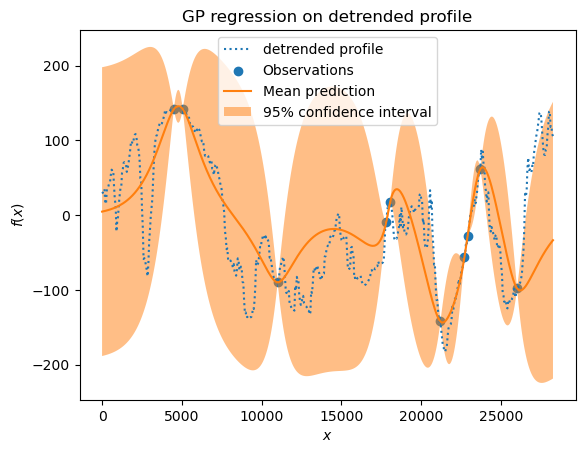

In [67]:
mean_prediction2, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y_det, label=r"detrended profile", linestyle="dotted")
plt.scatter(X_train_det, y_train_det, label="Observations")
plt.plot(X, mean_prediction2, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction2 - 1.96 * std_prediction,
    
    mean_prediction2 + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("GP regression on detrended profile")

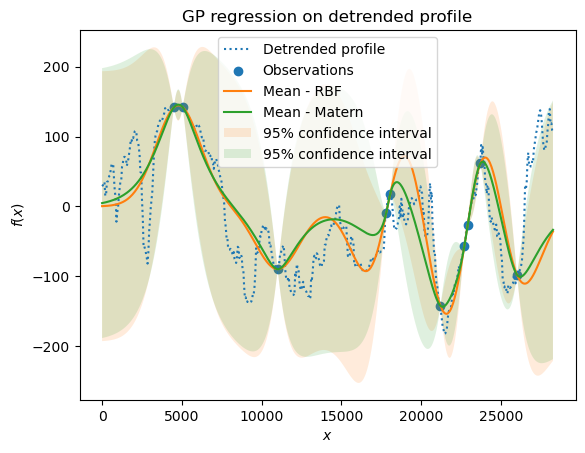

In [68]:
plt.plot(X, y_det, label=r"Detrended profile", linestyle="dotted")
plt.scatter(X_train_det, y_train_det, label="Observations")
plt.plot(X, mean_prediction, label="Mean - RBF")
plt.plot(X, mean_prediction2, label="Mean - Matern")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.15,
    label=r"95% confidence interval",
)
plt.fill_between(
    X.ravel(),
    mean_prediction2 - 1.96 * std_prediction,
    mean_prediction2 + 1.96 * std_prediction,
    alpha=0.15,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("GP regression on detrended profile")